In [2]:
import numpy as np
from scipy.integrate import odeint
# import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT
import math

In [ ]:
'''
Need to fix
self replication of T cells
sigmoidal function

'''

In [184]:
#function that returns dy/dt
def model(z,t,co):
    # Initial conditions
    N = z[0] #N = naive T-cells
    T = z[1] #T = Activated T-cells
    I = z[2] #I = IL-2
    R = z[3] #R = TRegs
    
    # Constant Values
    beta = co[0]
    mu =co[1]
    delta_N = co[2]   
    a = co[3]
    delta_T = co[4]
    s = co[5]
    e_T = co[6]
    delta_I = co[7]
    alpha = co[8]
    c = co[9]
    g = co[10]
    k = co[11]
    e_R = co[12]
    p = co[13]
    r = co[14]
    delta_R = co[15]
    

    
    dNdt = beta*N*(1-N/100000) - mu*N - delta_N*N -g*N
    dTdt = (mu*N -r*R + a*I)*T*(1-((R+T)/k)) - delta_T*T
    dIdt = s*T - e_T*I*T - delta_I*I-e_R*I*R
    dRdt = (alpha*R + c*R + g*N)*R*(1-((R+T)/k)) - delta_R*R*(1/(1+math.exp(-p*I)))
    
    return [dNdt, dTdt, dIdt, dRdt]

In [198]:
# initial condition
# z0 = [N,T,I,R]
z0 = [10,66,30,50]

##################
#  Thymus Exit   #
##################
alpha = 1 #-------- T Regulatory Cells
beta = 3   #-------- Naive T cells

#########################################
#  Naive T cell Differentiation Rates   #
#########################################
g = 0.39 #-------To T regulatory Cells
mu = 2 #------ To activated T cells
r = 0.1  #----- Strength of suppression on Naive T cell differention to activation

#############################
#  Self Replication Rates   #
#############################
c = 0.2 #------------T regulatory cells


##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
s = 0.05 #------- T Cell Expression
e_T = 0.01 #------ T Cell Consumption Rate
e_R = 0.01 #------ T Reg Consumption Rate

###########################
#  IL-2 Cytokine Effects  #
###########################
p = 0.01 #----- Strenght of effect on Treg death Rate
a = 20   #------------Activated T cells


##################
#  Death Rates   #
##################
delta_N = 0.4 #-----------Naive T cells
delta_T = 0.1 #-----------Activated T cells
delta_R = 0.1 #----------Regulatory T Cells
delta_I = 1 #-------------IL-2 Cytokine

#########################################
#  Carrying Capacity Parameter Values   #
#########################################
k = 10000 #----- For both T reg and Activated T cells

#Constants are saved in a array that is fed to the odeint function
co = [beta, mu, delta_N, a,delta_T,s,e_T,delta_I, alpha, c, g, k, e_R, p,r,delta_R]
# time points
t = np.linspace(0,50,500)

# solve ODE
z = odeint(model,z0,t, args=(co,))

N = z[:,0]
T = z[:,1]
I = z[:,2]
R = z[:,3]

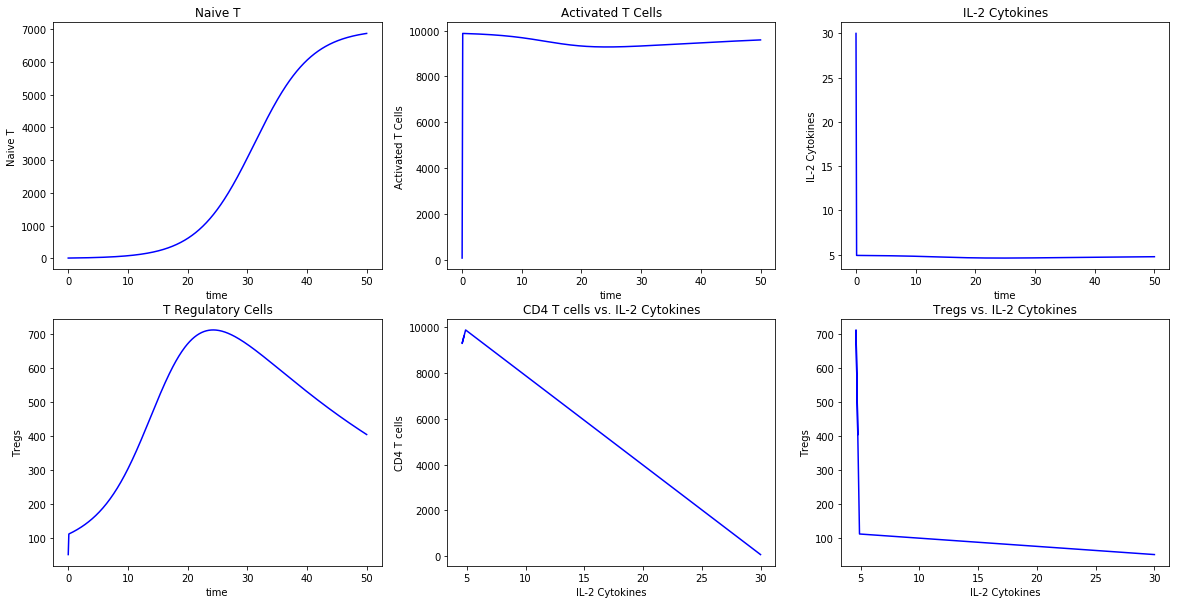

In [199]:
fig = PLT.figure(figsize=(20,10))

ax1 = fig.add_subplot(231)
ax1.plot(t,N, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Naive T')
ax1.set_title('Naive T')

ax2 = fig.add_subplot(232)
ax2.plot(t,T,'b-')
ax2.set_xlabel('time')
ax2.set_ylabel('Activated T Cells')
ax2.set_title('Activated T Cells')


ax3 = fig.add_subplot(233)
ax3.plot(t,I,'b-')
ax3.set_xlabel('time')
ax3.set_ylabel('IL-2 Cytokines')
ax3.set_title('IL-2 Cytokines')

ax4 = fig.add_subplot(234)
ax4.plot(t,R,'b-')
ax4.set_xlabel('time')
ax4.set_ylabel('Tregs')
ax4.set_title('T Regulatory Cells')

ax5 = fig.add_subplot(235)
ax5.plot(I,T,'b-')
ax5.set_xlabel('IL-2 Cytokines')
ax5.set_ylabel('CD4 T cells')
ax5.set_title('CD4 T cells vs. IL-2 Cytokines')

ax6 = fig.add_subplot(236)
ax6.plot(I,R,'b-')
ax6.set_xlabel('IL-2 Cytokines')
ax6.set_ylabel('Tregs')
ax6.set_title('Tregs vs. IL-2 Cytokines')

PLT.show()